In [1]:
# uses pyCaret to find optimise model and tune it
# check version
from library.common import Core
core = Core()

from pycaret.utils import version
from pycaret.regression import *
version()

'2.3.5'

In [2]:
# Set up pyCaret Regression
# load dataset
regions_list  = core.list_of_regions
r = 0
cluster = regions_list[r]
print(cluster)

data = core.get_cluster_regression_datas(cluster = cluster, first = core.start_year, last = core.stop_year)
reg0 = setup(data, target = 'co2', session_id=123, log_experiment=True,
             normalize = core.regression_normalize, normalize_method = core.normalize_method,
             remove_outliers = core.remove_outliers, outliers_threshold = core.outliers_threshold,
             verbose = False, silent = core.silent_mode,
             experiment_name= f'carbon emission Cluster {r}')

best_model = compare_models(fold= core.regression_cv, sort = core.error_optimise, round = 1)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,18.6,532.0,22.4,1.0,0.0,0.0,1.2
huber,Huber Regressor,17.9,536.0,22.6,1.0,0.0,0.0,0.0
br,Bayesian Ridge,18.2,540.9,22.6,1.0,0.0,0.0,0.0
et,Extra Trees Regressor,25.7,1179.5,31.1,1.0,0.0,0.0,0.1
gbr,Gradient Boosting Regressor,28.1,1267.8,34.2,1.0,0.0,0.0,0.0
rf,Random Forest Regressor,31.2,1764.3,39.5,1.0,0.0,0.0,0.1
lasso,Lasso Regression,33.5,1830.4,41.1,1.0,0.1,0.0,0.8
llar,Lasso Least Angle Regression,36.7,2216.6,45.4,1.0,0.1,0.0,0.0
par,Passive Aggressive Regressor,39.6,2556.7,49.1,0.9,0.1,0.0,0.0
ada,AdaBoost Regressor,40.2,2666.5,50.4,0.9,0.1,0.0,0.0


In [3]:
selected_model = 'lr'
model = create_model(selected_model)
tuned_model = tune_model(model, n_iter=100, optimize = 'MSE', round = 1)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,10.6,127.1,11.3,1.0,0.0,0.0
1,14.6,348.9,18.7,1.0,0.0,0.0
2,16.2,423.6,20.6,1.0,0.0,0.0
3,27.8,972.1,31.2,1.0,0.0,0.0
4,26.9,776.8,27.9,1.0,0.0,0.0
5,19.8,555.5,23.6,1.0,0.0,0.0
6,15.0,270.4,16.4,1.0,0.0,0.0
7,14.9,478.3,21.9,1.0,0.0,0.0
8,29.7,1202.0,34.7,0.9,0.0,0.0
9,15.1,260.6,16.1,1.0,0.0,0.0


In [4]:
selected_model = 'huber'
model = create_model(selected_model)
tuned_model = tune_model(model, n_iter=50, optimize = 'MSE', round = 1)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,11.3,163.4,12.8,1.0,0.0,0.0
1,15.3,387.7,19.7,1.0,0.0,0.0
2,17.7,427.8,20.7,1.0,0.0,0.0
3,27.0,965.5,31.1,1.0,0.0,0.0
4,26.3,788.2,28.1,1.0,0.0,0.0
5,17.9,523.0,22.9,1.0,0.0,0.0
6,15.1,302.4,17.4,1.0,0.0,0.0
7,14.5,519.2,22.8,1.0,0.0,0.0
8,30.4,1269.4,35.6,0.8,0.0,0.0
9,14.6,240.4,15.5,1.0,0.0,0.0


In [5]:
selected_model = 'br'
model = create_model(selected_model)
tuned_model = tune_model(model, n_iter=50, optimize = 'MSE', round = 1)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,10.9,145.9,12.1,1.0,0.0,0.0
1,13.9,334.2,18.3,1.0,0.0,0.0
2,17.3,426.3,20.6,1.0,0.0,0.0
3,26.2,932.1,30.5,1.0,0.0,0.0
4,26.1,762.8,27.6,1.0,0.0,0.0
5,18.9,525.8,22.9,1.0,0.0,0.0
6,14.1,272.0,16.5,1.0,0.0,0.0
7,14.7,533.8,23.1,1.0,0.0,0.0
8,30.7,1295.7,36.0,0.8,0.0,0.0
9,13.6,226.2,15.0,1.0,0.0,0.0


In [6]:
tuned_model

BayesianRidge(alpha_1=0.3, alpha_2=0.3, alpha_init=None, compute_score=True,
              copy_X=True, fit_intercept=True, lambda_1=1e-06, lambda_2=0.3,
              lambda_init=None, n_iter=300, normalize=True, tol=0.001,
              verbose=False)

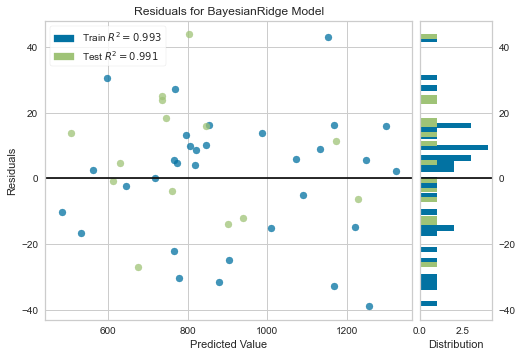

In [7]:
plot_model(tuned_model)

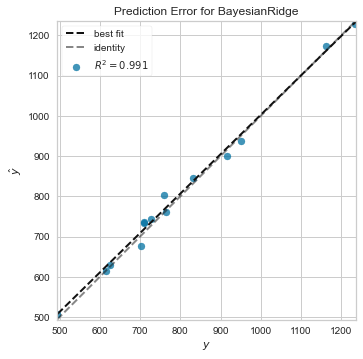

In [8]:

plot_model(tuned_model, plot = 'error')

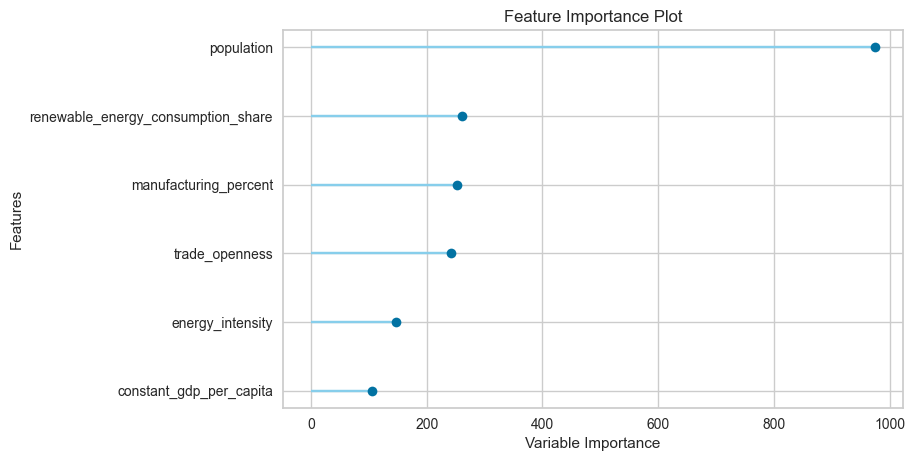

In [9]:

plot_model(tuned_model, plot = 'feature')

In [10]:

evaluate_model(tuned_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [11]:
try:
    interpret_model(tuned_model)
except:
    print('No plot for this model')


No plot for this model


In [12]:
try:
    interpret_model(tuned_model, plot = 'correlation')
except:
    print('No plot for this model')

No plot for this model


In [13]:
try:
    interpret_model(tuned_model, plot = 'reason', observation = 12)
except:
    print('No plot for this model')

No plot for this model


In [17]:

data = core.get_forecasts()
data_unseen = data.loc[data.cluster.eq(cluster),]
print(data_unseen[['cluster', 'year', 'co2']])
data = data.drop(columns =  ['co2'])

     cluster  year          co2
0  Cluster 0  2017  1346.203089
1  Cluster 0  2018  1356.124541
2  Cluster 0  2019  1366.488109
3  Cluster 0  2020  1383.624173


In [15]:

# generate predictions on unseen data
final_model = finalize_model(tuned_model)
predictions = predict_model(final_model, data = data_unseen)
predictions = predictions.rename(columns = {'Label': 'co2'})
predictions[['year', 'co2']]

,year,co2,co2
0,2017,1346.203089,1361.402833
1,2018,1356.124541,1391.966571
2,2019,1366.488109,1422.529719
3,2020,1383.624173,1453.093447
